In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_csv_data(filename):
    # Read the given csv file, except the first four unwanted rows
    ccDf = pd.read_csv(filename, skiprows=4)

    # drop unnecessary columns
    ccDf = ccDf.drop(columns=['Country Code', 'Indicator Code', 'Unnamed: 66'])

    # melt the dataframe and use pivot_table to create the desired dataframe format
    ccDf = ccDf.melt(id_vars=['Country Name', 'Indicator Name'], var_name='Year', value_name='Value')
    ccDf = ccDf.pivot_table(values='Value', columns='Indicator Name', index=['Country Name', 'Year']).reset_index()

    # drop null values from both the rows and columns
    ccDf = ccDf.dropna(thresh=int(0.25 * ccDf.shape[0]), axis=1)
    ccDf = ccDf.dropna(thresh=int(0.25 * ccDf.shape[1]))

    # set years as columns
    dfYears = ccDf.set_index(['Year', 'Country Name']).unstack(level=0).swaplevel(axis=1).sort_index(axis=1, level=0)

    # set countries as columns
    dfCountries = ccDf.set_index(['Year', 'Country Name']).unstack(level=1).swaplevel(axis=1).sort_index(axis=1, level=0)
    
    return dfYears, dfCountries

In [3]:
countries = ['Brazil', 'Vanuatu', 'India', 'Albania', 'Poland', 'Turkiye']
indicators = [
    'Electricity production from nuclear sources (% of total)',
    'CO2 emissions (kg per 2017 PPP $ of GDP)',
    'School enrollment, primary and secondary (gross), gender parity index (GPI)',
    'Total greenhouse gas emissions (kt of CO2 equivalent)',
    'Electricity production from hydroelectric sources (% of total)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Urban population (% of total population)',
    'Urban population growth (annual %)',
    'Electricity production from natural gas sources (% of total)',
    'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
]

In [4]:
dfYears, dfCountries = read_csv_data("ClimateChangeData.csv")

In [5]:
df = dfYears[[str(i) for i in range(1990, 2019)]].unstack().unstack(level=1).reset_index()
df = df[df["Country Name"].isin(countries)][indicators+['Country Name', 'Year']].reset_index(drop=True)
df.head()

Indicator Name,Electricity production from nuclear sources (% of total),CO2 emissions (kg per 2017 PPP $ of GDP),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Total greenhouse gas emissions (kt of CO2 equivalent),Electricity production from hydroelectric sources (% of total),"Mortality rate, under-5 (per 1,000 live births)",Urban population (% of total population),Urban population growth (annual %),Electricity production from natural gas sources (% of total),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Country Name,Year
0,0.000000,0.376947,0.94653,11100.0,86.407767,40.8,36.428,2.543043,0.000000,-459.987793,Albania,1990
1,1.003945,0.126242,NaN,590340.0,92.768635,63.2,73.922,2.874730,0.146306,-13684.253906,Brazil,1990
2,2.097823,0.355937,NaN,1219550.0,24.478362,126.5,25.547,3.092930,3.401746,-91331.625000,India,1990
3,0.000000,0.816139,1.00764,420330.0,1.054198,17.4,61.270,0.465871,0.092996,-8329.968750,Poland,1990
4,0.000000,0.204404,0.78226,205440.0,40.227308,74.2,59.203,4.120633,17.711972,-9007.396484,Turkiye,1990


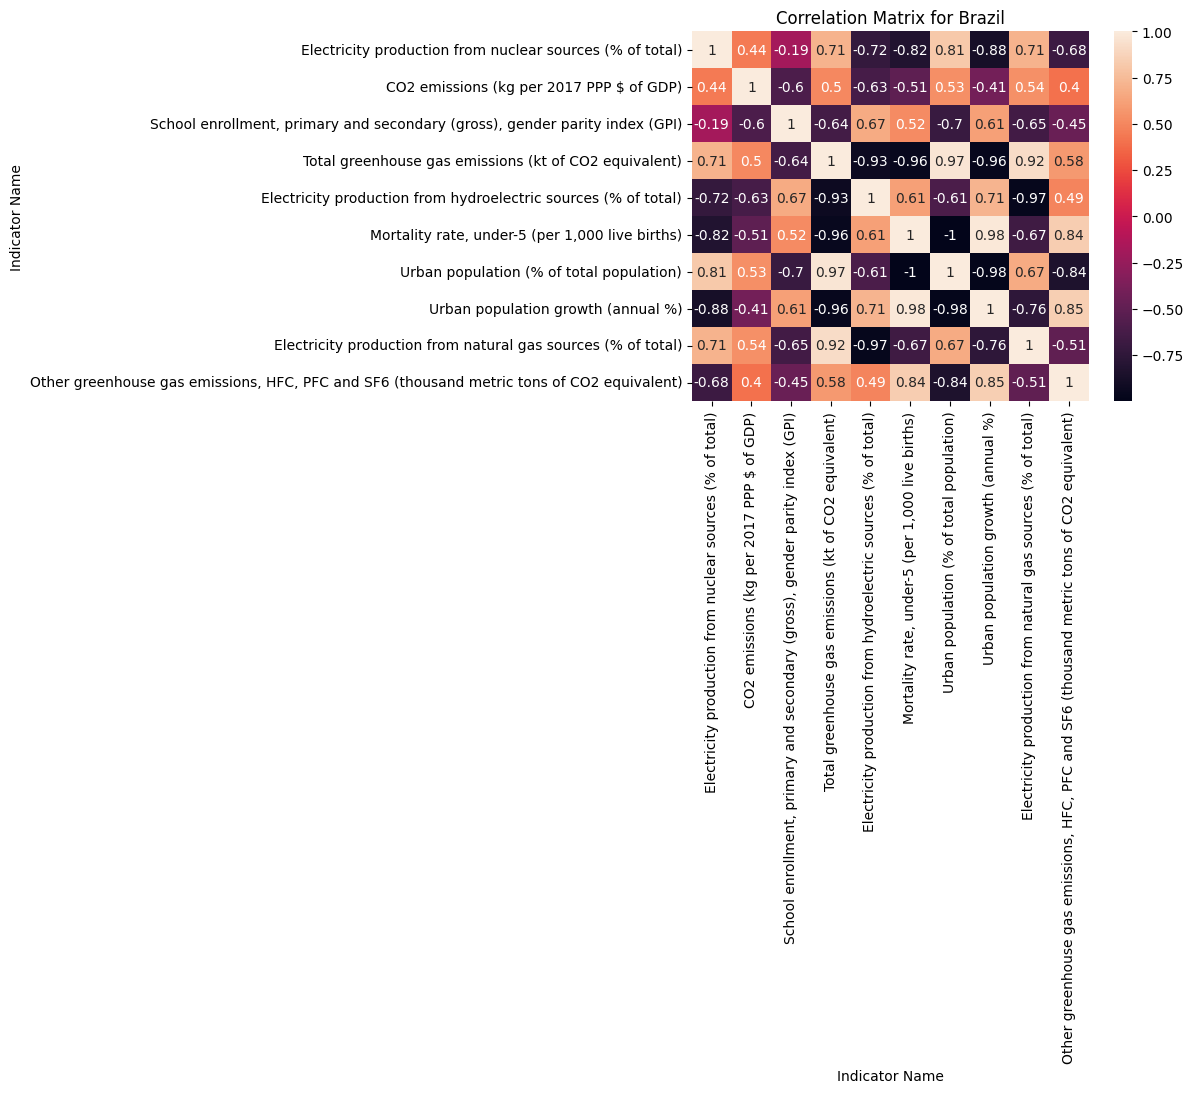

In [6]:
ax = sns.heatmap(dfCountries['Brazil'][indicators].corr(), annot=True)
ax.set_title(f"Correlation Matrix for Brazil")
plt.show()

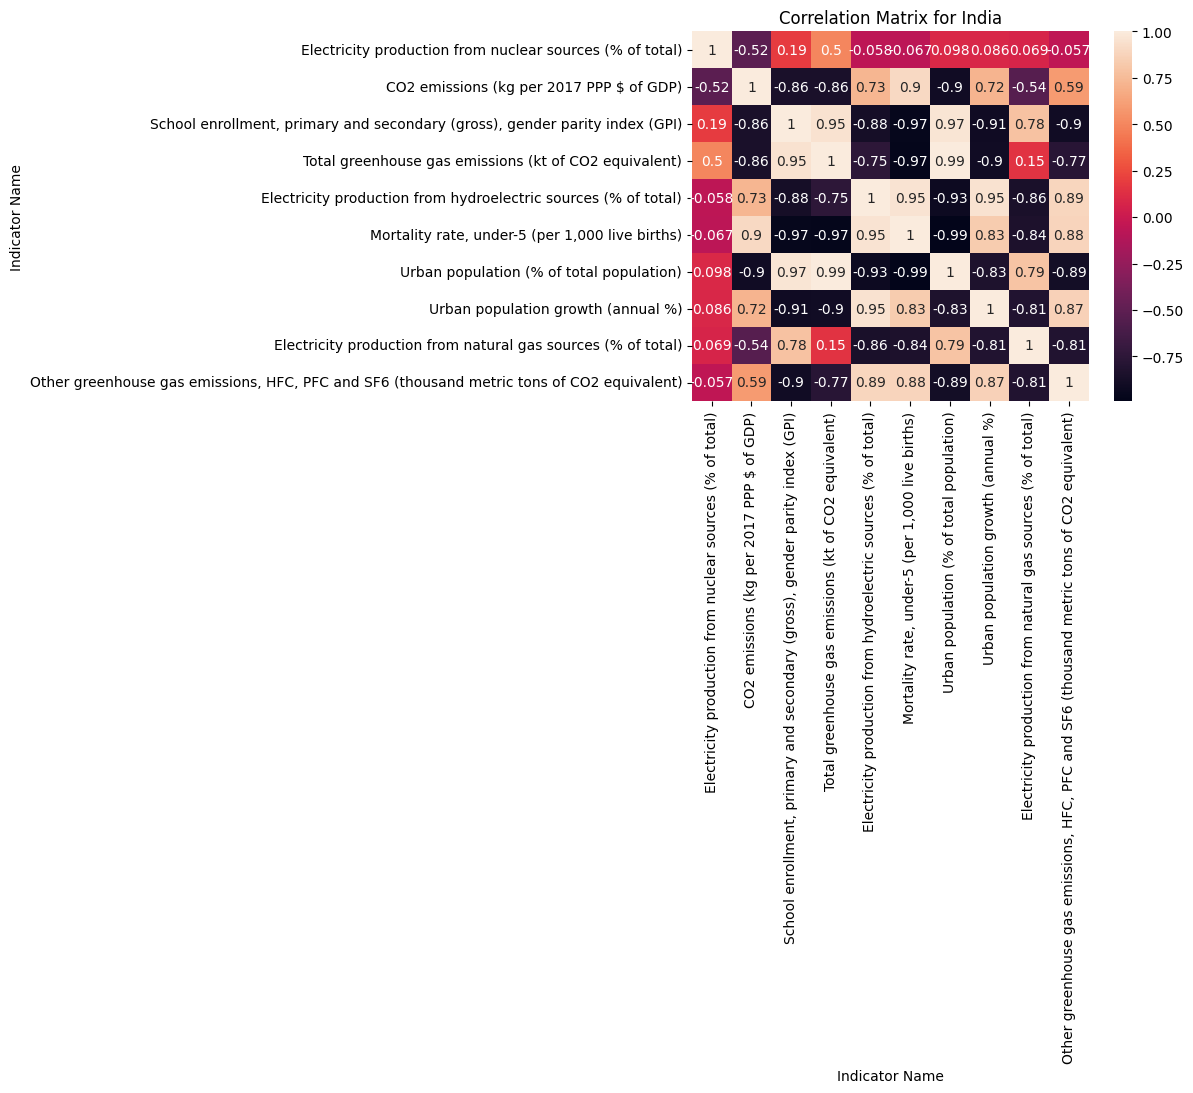

In [7]:
ax = sns.heatmap(dfCountries['India'][indicators].corr(), annot=True)
ax.set_title(f"Correlation Matrix for India")
plt.show()

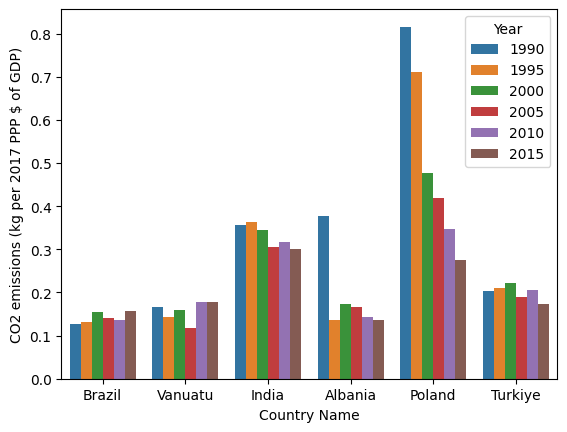

In [8]:
ax = sns.barplot(x = 'Country Name', y = 'CO2 emissions (kg per 2017 PPP $ of GDP)', hue = 'Year', 
                 data = dfYears[['1990', '1995', '2000', '2005', '2010', '2015']].loc[countries].unstack().unstack(level=1).reset_index())
plt.show()

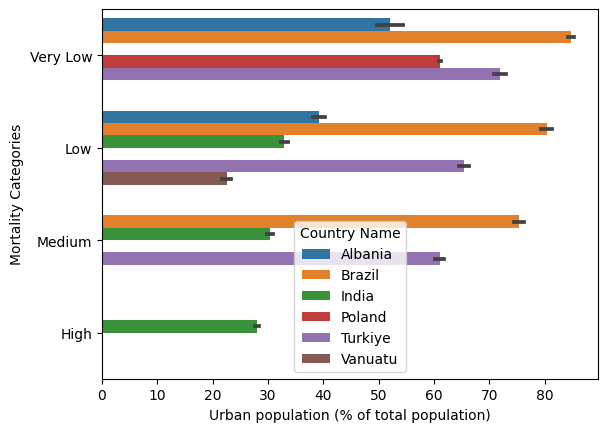

In [9]:
# create a new column for mortality rate categories
df[f'Mortality Categories'] = pd.cut(df['Mortality rate, under-5 (per 1,000 live births)'], bins=[0, 25, 50, 75, 100], labels=['Very Low', 'Low', 'Medium', 'High'])

# create a horizontal bar plot
ax = sns.barplot(x='Urban population (% of total population)', y=f'Mortality Categories', data=df, hue='Country Name')

<Axes: xlabel='Year', ylabel='Total greenhouse gas emissions (kt of CO2 equivalent)'>

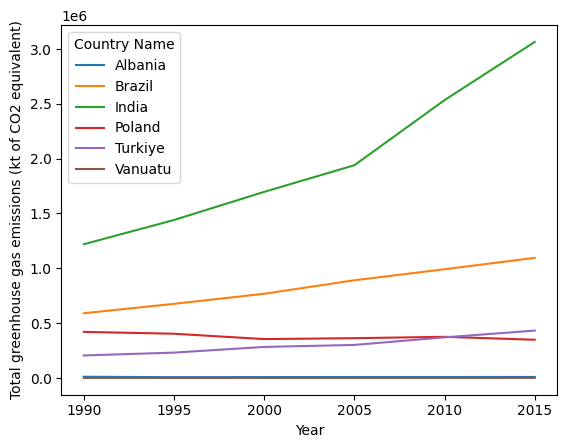

In [10]:
# create a multiple line plot
sns.lineplot(x='Year', y='Total greenhouse gas emissions (kt of CO2 equivalent)', hue='Country Name', data=df[df.Year.isin([str(i) for i in range(1990, 2016, 5)])])

<Axes: xlabel='Year', ylabel='Mortality rate, under-5 (per 1,000 live births)'>

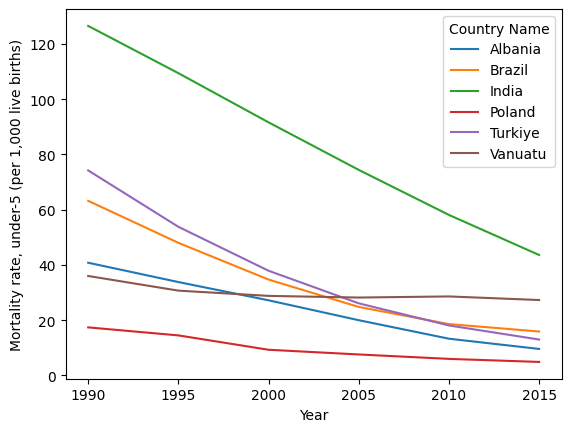

In [11]:
# create a multiple line plot
sns.lineplot(x='Year', y='Mortality rate, under-5 (per 1,000 live births)', hue='Country Name', data=df[df.Year.isin([str(i) for i in range(1990, 2016, 5)])])

In [12]:
col='Mortality rate, under-5 (per 1,000 live births)'
newDf = dfYears[[('1995', col), ('2005', col), ('2015', col)]].loc[countries]
newDf.columns = newDf.columns.droplevel(1)
newDf

Year,1995,2005,2015
Country Name,,,
Brazil,48.0,24.8,15.9
Vanuatu,30.7,28.2,27.3
India,109.4,74.4,43.6
Albania,33.8,20.0,9.6
Poland,14.5,7.6,4.9
Turkiye,53.8,26.1,13.0


<Axes: xlabel='School enrollment, primary and secondary (gross), gender parity index (GPI)'>

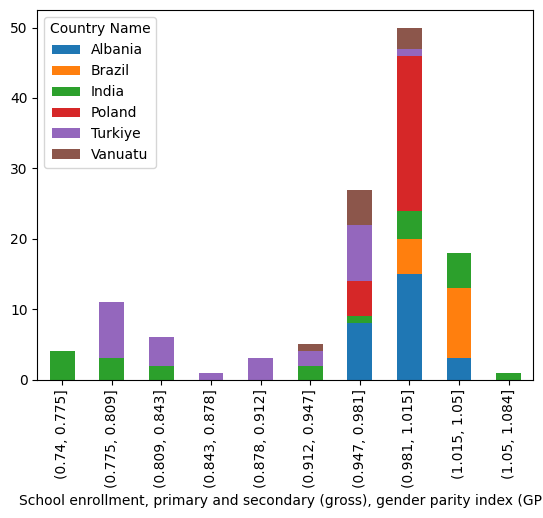

In [13]:
# create a stacked bar plot
pd.crosstab(pd.cut(df['School enrollment, primary and secondary (gross), gender parity index (GPI)'], 10), df['Country Name']).plot.bar(stacked=True)